In [102]:
import pandas as pd
import seaborn as sns
import numpy as np

In [125]:
# Параметры

# Кол-во наблюдений
samples = 300

# Список товаров (и цен за литр) в нашей сети магазинов продуктовых жидкостей
product_details = ({
    "Молоко 'Будёнка'":                80 , 
    "Ряженка 'Яшкина радость'":        75 ,
    "Йогурт 'Цветы заполярья'":        110,
    "Кефир 'Нахальная гербера'":       70 ,
    "Сок 'Овощная Идиллия'":           95 ,
    "Водка 'Слеза комсомольца'":       140, # Водка - самая дорогая жидкость в нашем ассортименте. #МыЗаТрезвость
    "Портвейн 'Три товарища'":         50 , # А портвейн - самый дешевый...                        #МыЗаДоступность
    "Минеральная вода 'PostScriptum'": 100
})

# Мы продаем жидкоси на любой вкус*
#   *(только в сферических прямоугольных коробках, в вакууме)
# Упаковки, мм (Длина х Ширина х Высота)
pack_sizes = ([
    (20 , 10, 7.5),
    (8.5, 5 , 5  ),
    (9  , 7 , 4  ),
    (21 , 10, 7  ),
    (18 , 8 , 8  ),
    (11 , 4 , 5  ),
    (7  , 7 , 4  )
])

shops_geolocations = 

In [122]:
product_names = list(product_details.keys())
product_prices = list(product_details.values())

products = [product_names[x] for x in np.random.choice(len(product_names), samples)]
prices = [product_details[y] for y in products]

packs = np.random.choice(len(pack_sizes), samples)
x_vals = [pack_sizes[x][0] for x in packs]
y_vals = [pack_sizes[y][1] for y in packs]
z_vals = [pack_sizes[z][2] for z in packs]

# Условимся, что по габаритам можно высчитать объем
volume = [(x_vals[n] * y_vals[n] * z_vals[n]) / 1000 for n in range(samples)]
# Цена зависит отобъема
final_price = [volume[n] * prices[n] for n in range(samples)]

orders = np.random.choice(50, samples)
total_revenue = [orders[n] * final_price[n] for n in range(samples)]

data = ({
    "Name":          products   ,
    "PricePerLiter": prices     ,
    "boxWidth":      x_vals     ,
    "boxLenght":     y_vals     ,
    "boxHeight":     z_vals     ,
    "Volume":        volume     ,
    "ShelfPrice":    final_price,
    "Orders":        orders     ,
    "Revenue":       total_revenue
})

df = pd.DataFrame(data)
df.head()

,Name,PricePerLiter,boxWidth,boxLenght,boxHeight,Volume,ShelfPrice,Orders,Revenue
0,Йогурт 'Цветы заполярья',110,20.0,10,7.5,1.5000,165.00,18,2970.00
1,Сок 'Овощная Идиллия',95,20.0,10,7.5,1.5000,142.50,1,142.50
2,Портвейн 'Три товарища',50,11.0,4,5.0,0.2200,11.00,31,341.00
3,Водка 'Слеза комсомольца',140,8.5,5,5.0,0.2125,29.75,27,803.25
4,Кефир 'Нахальная гербера',70,7.0,7,4.0,0.1960,13.72,48,658.56


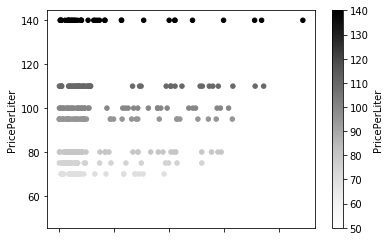

In [123]:
df.plot.scatter(y="PricePerLiter", x = "Revenue",c="PricePerLiter")

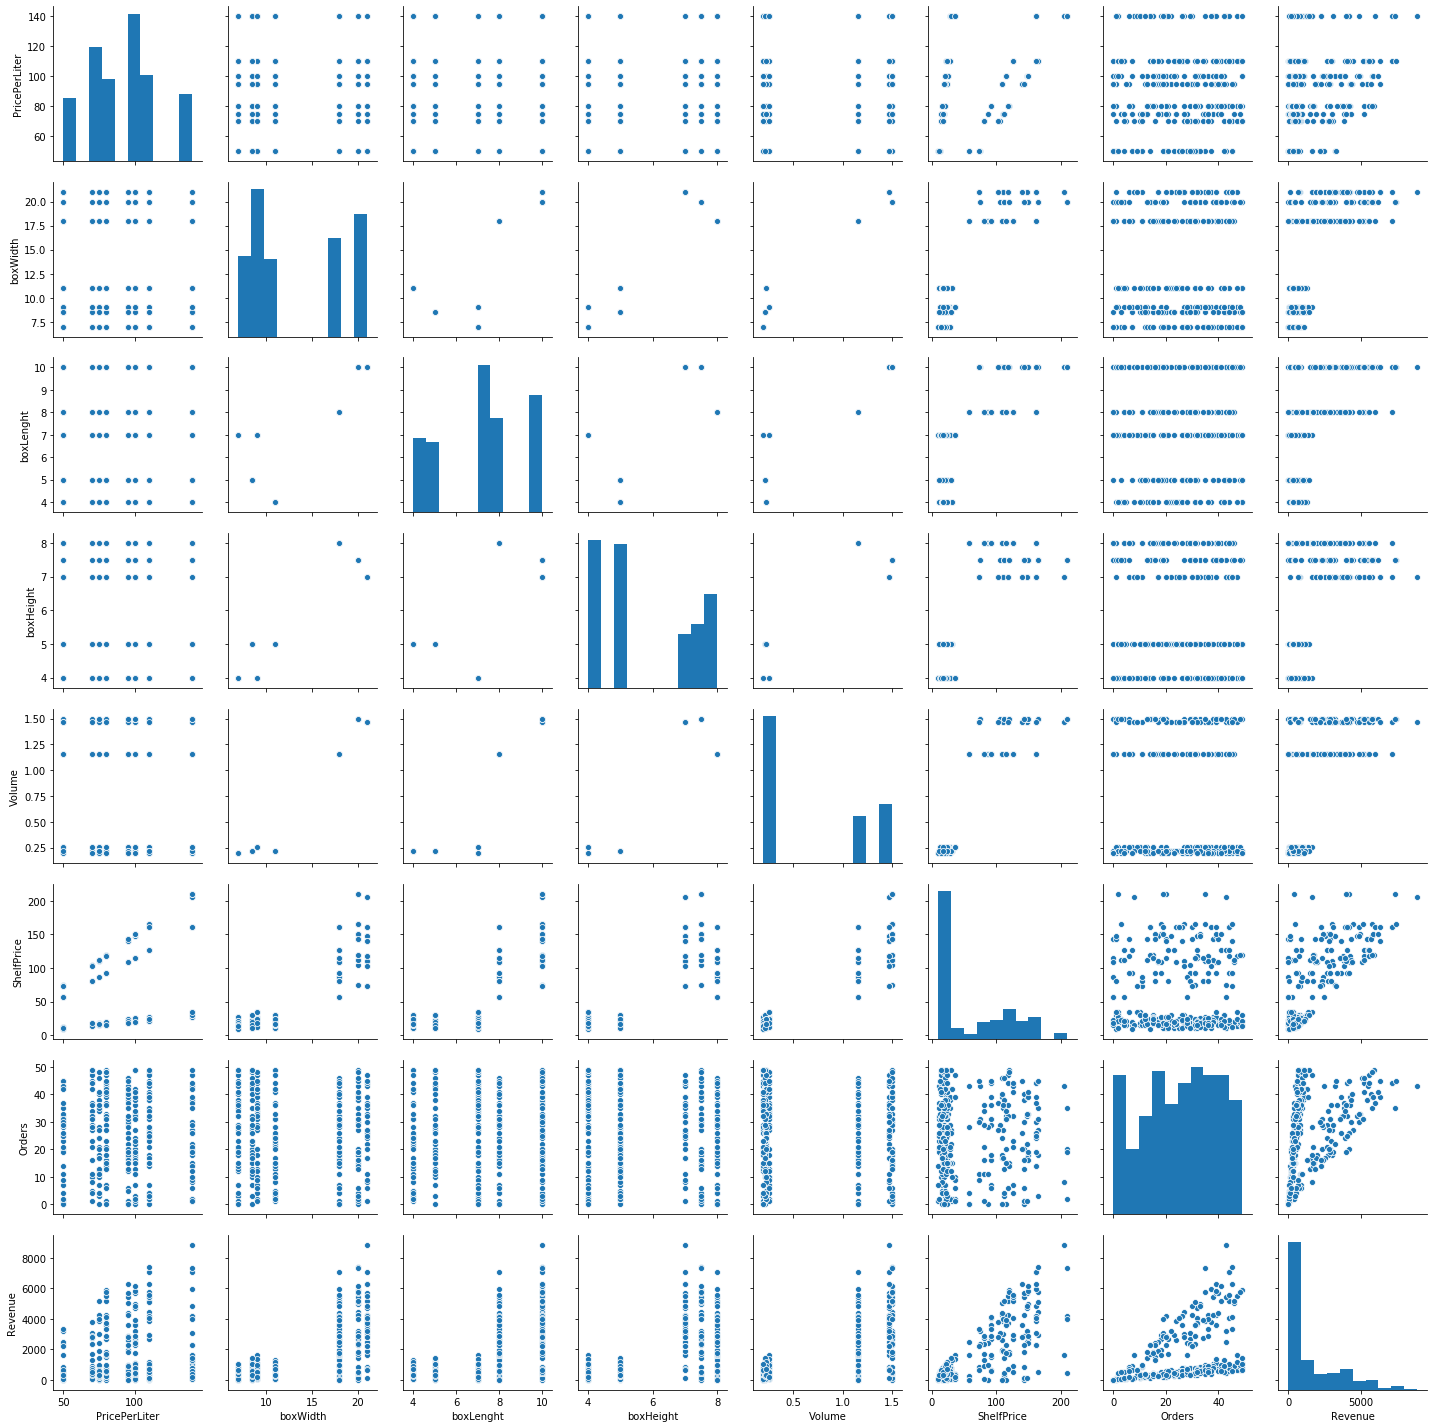

In [124]:
sns.pairplot(df)